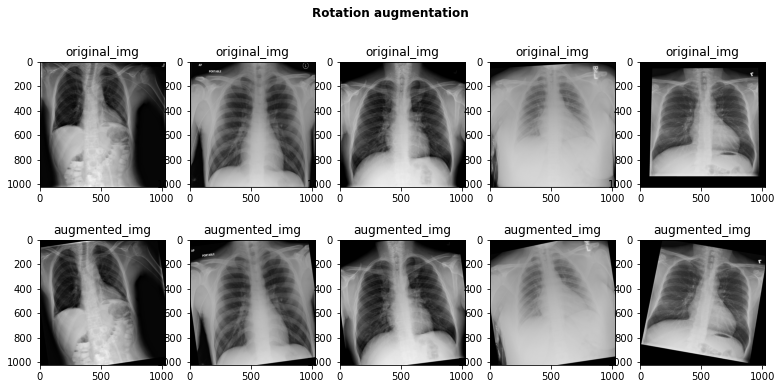

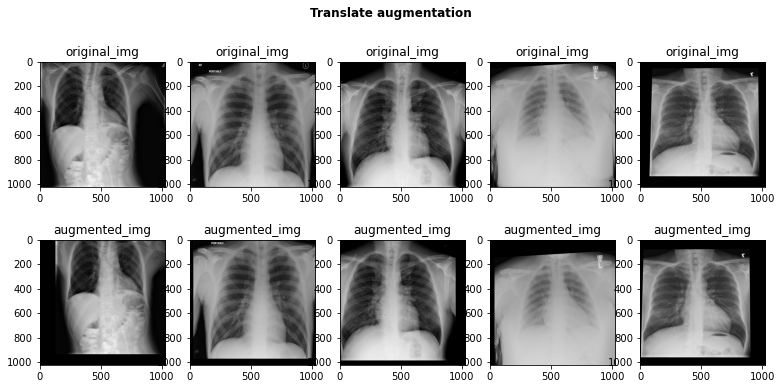

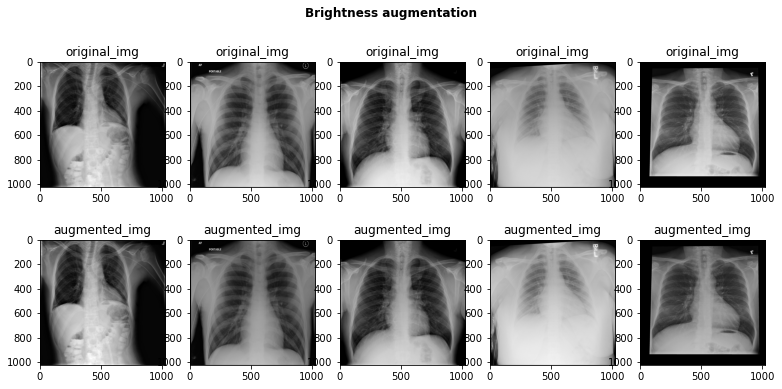

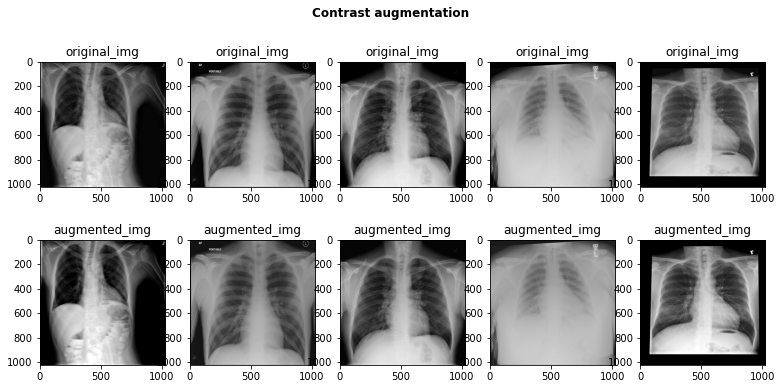

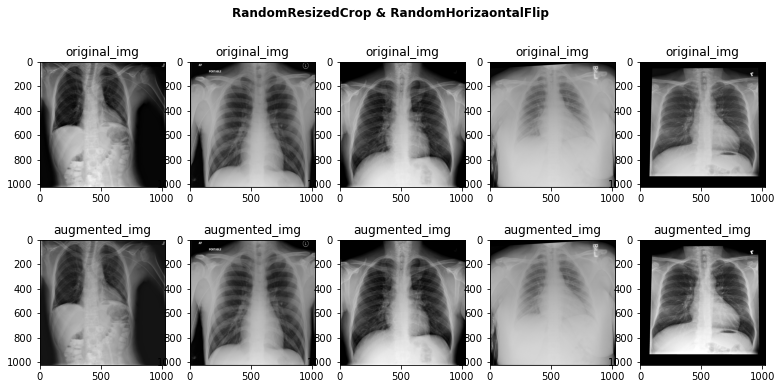

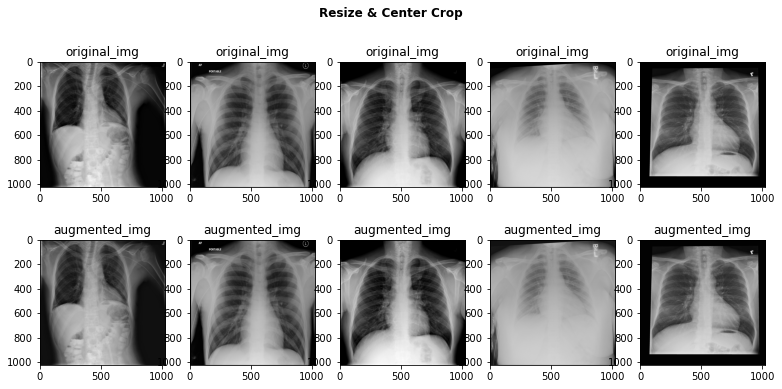

In [1]:
import tempfile
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import cv2

#file path 만 설정해주세요! (아래 directory에는 5개의 CXR 이미지가 있었습니다)
file_path = 'augmentation_test'
img = []
for i in range(5):
    img_name = file_path+'/img{0}.png'.format(i+1)
    img.append(cv2.imread(img_name))


def display_augmented_images(aug_f, img, title ='default'):
    fig, subplots = plt.subplots(2, 5, figsize=(13, 6))
    fig.suptitle('{}'.format(title),fontweight ="bold")
    for i in range(5):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+5]
        
        original_img = Image.fromarray(img[i])
        augmented_img = aug_f(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')


#Rotation augmentation
'''
Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees). Set to 0 to deactivate rotations.
'''
title = 'Rotation augmentation'
aug_f = transforms.RandomAffine(degrees=(-10,10))
display_augmented_images(aug_f, img, title)

#Rotation augmentation
'''
Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees). Set to 0 to deactivate rotations.
'''
title = 'Rotation augmentation'
        transforms.ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.3)),


#Translate augmentation
'''
For example translate=(a, b), then horizontal shift is randomly sampled in the range -img_width * a < dx < img_width * a and vertical shift is randomly sampled in the range -img_height * b < dy < img_height * b. Will not translate by default.
'''
title = 'Translate augmentation'
aug_f = transforms.RandomAffine(degrees=0, translate=(0.15,0.1))
display_augmented_images(aug_f, img, title)


#Brightness augmentation
title = 'Brightness augmentation'
aug_f = transforms.ColorJitter(brightness=(0.8, 1.2))
display_augmented_images(aug_f, img, title)


#Contrast augmentation
title = 'Contrast augmentation'
aug_f = transforms.ColorJitter(contrast=(0.8, 1.3))
display_augmented_images(aug_f, img, title)


#Pytorch tutorial train augmentation -> RandomResizedCrop & RandomHorizaontalFlip
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
    ])
}
title = 'RandomResizedCrop & RandomHorizaontalFlip'
display_augmented_images(aug_f, img, title)


#Pytorch tutorial val augmentation -> Resize & Center Crop
# Resize -> Resize 직전 원본이미지의 가로 세로 중 짧은 크기에 해당하는 부분은 256으로 만들어준다 (keeping aspect ratio) 
# 실제로 테스트해보니 Resize부분을 300x300으로 설정해준 후 Center Crop 을 해주는게 더 좋아보였음
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(size=(256,256)),
        transforms.CenterCrop(224),
    ])
}
title = 'Resize & Center Crop'
display_augmented_images(aug_f, img, title)